In [1]:
%load_ext autoreload
%autoreload 2

In [38]:
#Http request
from requests import post as http_post

#Path manipulations
from pathlib import Path

#Constants
from common import constants

#Dropbox
from dropbox import Dropbox
from dropbox.files import UploadSessionCursor as Dropbox_UploadSessionCursor
from dropbox.files import CommitInfo as Dropbox_CommitInfo

#Progress bar
from tqdm import tqdm

dropbox = Dropbox('RJNtqAmFFEgAAAAAAAG0Gtn39Pq66F8FFa9248CmepaGrLpvEcEo3XVeX3AiYmPH')

constants.DROPBOX_CHUNK_SIZE = 2000

def _upload(dropbox_dir, filename):
    with open(filename, 'rb') as handle:
        #Target path
        dropbox_path = (Path(dropbox_dir) / filename).as_posix()

        #File size
        upload_size = path.getsize(filename)

        #Upload session
        session = dropbox.files_upload_session_start(handle.read(constants.DROPBOX_CHUNK_SIZE))
        cursor = Dropbox_UploadSessionCursor(session_id = session.session_id, offset = handle.tell())
        commit = Dropbox_CommitInfo(path = dropbox_path)
        
        print(dropbox_path)

        #Upload look
        with tqdm(desc = 'Uploading file: {} size: {}'.format(dropbox_path, upload_size), total = upload_size) as pbar:
            #Update the progress bar for the session start reads
            pbar.update(handle.tell())
            
            while handle.tell() < upload_size:
                #Calculate remaining bytes
                remaining_bytes = upload_size - handle.tell()

                #If it is the last chunk, finalize the upload
                if remaining_bytes <= constants.DROPBOX_CHUNK_SIZE:
                    dropbox.files_upload_session_finish(
                                    handle.read(remaining_bytes),
                                    cursor,
                                    commit)

                    #Update progress
                    pbar.update(remaining_bytes)
                #More than chunk size remaining to upload
                else:
                    dropbox.files_upload_session_append_v2(
                                        handle.read(constants.DROPBOX_CHUNK_SIZE),
                                        cursor)

                    #Update the cursor
                    cursor.offset = handle.tell()

                    #Update the progress
                    pbar.update(constants.DROPBOX_CHUNK_SIZE)

In [39]:
dropbox_dir = path.join(constants.DROPBOX_APP_PATH_PREFIX, 'test_1')

_upload(dropbox_dir, 'siamese_network.log')

/run_data/test_1/siamese_network.log


Uploading file: /run_data/test_1/siamese_network.log size: 61195:   0%|                      | 0/61195 [00:00<?, ?it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:   7%|▌        | 4000/61195 [00:00<00:10, 5616.76it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  10%|▉        | 6000/61195 [00:01<00:13, 4103.36it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  13%|█▏       | 8000/61195 [00:02<00:15, 3510.09it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  16%|█▎      | 10000/61195 [00:03<00:19, 2662.94it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  20%|█▌      | 12000/61195 [00:04<00:22, 2224.11it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  23%|█▊      | 14000/61195 [00:05<00:22, 2128.11it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  26%|██      | 16000/61195 [00:07<00:25, 1764.87it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  29%|██▎     | 18000/61195 [00:08<00:25, 1685.13it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  33%|██▌     | 20000/61195 [00:09<00:20, 1975.11it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  36%|██▉     | 22000/61195 [00:10<00:20, 1953.82it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  39%|███▏    | 24000/61195 [00:11<00:17, 2134.63it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  42%|███▍    | 26000/61195 [00:11<00:16, 2127.09it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  46%|███▋    | 28000/61195 [00:13<00:16, 2009.30it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  49%|███▉    | 30000/61195 [00:13<00:13, 2281.11it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  52%|████▏   | 32000/61195 [00:14<00:12, 2374.35it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  56%|████▍   | 34000/61195 [00:15<00:11, 2307.25it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  59%|████▋   | 36000/61195 [00:16<00:13, 1887.05it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  62%|████▉   | 38000/61195 [00:17<00:11, 2059.67it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  65%|█████▏  | 40000/61195 [00:18<00:09, 2180.99it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  69%|█████▍  | 42000/61195 [00:19<00:08, 2349.21it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  72%|█████▊  | 44000/61195 [00:19<00:07, 2437.07it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  75%|██████  | 46000/61195 [00:20<00:06, 2280.99it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  78%|██████▎ | 48000/61195 [00:21<00:05, 2240.22it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  82%|██████▌ | 50000/61195 [00:23<00:05, 1915.96it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  85%|██████▊ | 52000/61195 [00:23<00:04, 2086.89it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  88%|███████ | 54000/61195 [00:25<00:04, 1724.04it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  92%|███████▎| 56000/61195 [00:26<00:03, 1685.22it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  95%|███████▌| 58000/61195 [00:27<00:01, 1717.31it/s]

progress: 2000


Uploading file: /run_data/test_1/siamese_network.log size: 61195:  98%|███████▊| 60000/61195 [00:28<00:00, 1937.74it/s]

remaining: 1195


Uploading file: /run_data/test_1/siamese_network.log size: 61195: 100%|████████| 61195/61195 [00:30<00:00, 1069.65it/s]


In [ ]:
#Get current working directory
from os import getcwd

#Unittests
import unittest as ut

#Local imports
from model_utils import load_pretrained_model
from visualization import HistoryInsights
from visualization import ModelInsights
from visualization import WeightInsights
from visualization import PlottingUtils
from common import ut_constants

#Keras
from keras import backend as K

model_name = "cnn_model2d_1"
store = ut_constants.DATA_STORE

model, _ = load_pretrained_model(model_name, store)
model_insights = ModelInsights(model)

#Disable training
K.set_learning_phase(0)


In [ ]:
from common import constants
from utils import load_images

import numpy as np

r_count = 5
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)
images = np.asarray(images)
images = np.expand_dims(images, axis = -1)

print(images.shape)



In [ ]:
inputs = [model.layers[0].input]
outputs = [model.get_layer('conv2d_1').output]

get_activations = K.function(inputs, outputs)
activations = get_activations([images])

In [ ]:
from matplotlib import pyplot as plt
from visualization import PlottingUtils as putils
from math import sqrt

for image_id in range(r_count):
    plt.figure()
    image_act = activations[0][image_id, :, :, :]
    n_filters = image_act.shape[-1]

    cols = int(sqrt(n_filters))
    rows = int((n_filters + cols - 1)/cols)

    image = images[image_id, :, :, :]
    image = np.reshape(image, (image.shape[0], image.shape[1]))
    plt.imshow(image, cmap = plt.get_cmap('gray'))
    figure, axes = plt.subplots(rows, cols, figsize = (12, 12))

    print(rows, cols, n_filters)

    for fid in range(n_filters):
        location = putils.get_plot_axes((rows, cols), fid)
        image = np.asarray(image_act[:, :, fid])
        axes[location].imshow(image, aspect='auto')

    figure.tight_layout()
    figure.savefig("image_{}.png".format(image_id), dpi=100)

In [ ]:
from common import constants
from utils import load_images
from image.operations import Operations

import numpy as np
import cv2
from matplotlib import pyplot as plt

#Keras visualizations
from keract import get_activations

#Unittests
import unittest as ut

#Local imports
from model_utils import load_pretrained_model
from common import ut_constants
from visualization import ModelInsights

r_count = 100
source_loc = constants.PROCESSED_DATASET_MAPPINGS['train']
images = load_images(source_loc, r_count)

model_name = "cnn_model2d_1"
store = ut_constants.DATA_STORE
model, _ = load_pretrained_model(model_name, store)

insights = ModelInsights(model)

model.summary()






In [ ]:
from keras.applications import VGG16
from vis.utils import utils
from keras import activations
from vis.visualization.saliency import visualize_cam

from matplotlib import pyplot as plt
from matplotlib import cm

from PIL import Image

import numpy as np

def get_layer_id(model, layer_name):
    for l_idx, layer in enumerate(model.layers):
        if layer.name == layer_name:
            return l_idx
    
    return None

l_idx = get_layer_id(model, 'conv2d_3')
figure, axes = plt.subplots(len(images), 2, figsize = (len(images), len(images)))

def change_contrast(img, level):
    factor = (259 * (level + 255)) / (255 * (259 - level))
    def contrast(c):
        return 128 + factor * (c - 128)
    return img.point(contrast)

for row, image in enumerate(images):
    img = np.expand_dims(image, axis = -1)

    # Utility to search for layer index by name. 
    # Alternatively we can specify this as -1 since it corresponds to the last layer.
    new_img = visualize_cam(model, l_idx, None, img)

    
    axes[row, 0].imshow(image, cmap = plt.get_cmap('gray'))
    axes[row, 1].imshow(new_img, cmap = plt.get_cmap('gray'))

figure.tight_layout()



In [12]:
from pickle import load
from pathlib import Path

bechmark_metrics = None
metrics = None

with Path('metric_data_benchmark.metric').open('rb') as handle:
    bechmark_metrics = load(handle)
    
with Path('metric_data.metric').open('rb') as handle:
    metrics = load(handle)
    

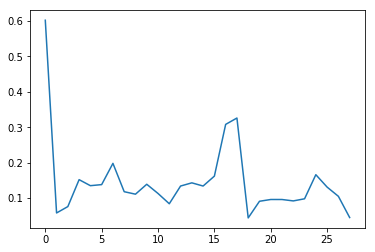

In [16]:
from matplotlib import pyplot as plt

plt.plot(bechmark_metrics['get_image_objects'])


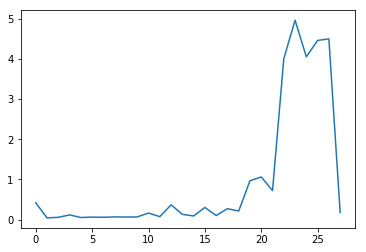

In [17]:
plt.plot(metrics['get_image_objects'])
plt.show()

In [ ]:
#Scratch
#img = imread(locate_train_img("0000e88ab.jpg"))

In [ ]:
print(X_TRAIN.shape)